In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

    * Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
    * Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
    * Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
    * Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

As final considerations:

    * You must include a written description of three observable trends based on the data.
    * You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
    * Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
    * Remember when making your plots to consider aesthetics!
      * Your legends should not be overlaid on top of any data.
      * Your bar graph should indicate tumor growth as red and tumor reduction as green.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.font_manager import FontProperties
fontP = FontProperties()

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
md_df = pd.read_csv(mouse_drug_data_to_load)
ct_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drugs_df = pd.merge(md_df, ct_df)

# Display the data table for preview
drugs_df.head(5)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## I'm cutting it one by one because indexes suck

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mtv_df = drugs_df.groupby(["Timepoint","Drug"]).agg({'Tumor Volume (mm3)':['mean','sem'],
                                                      'Metastatic Sites':['mean','sem']})
mtv_df = pd.DataFrame(mtv_df).unstack()
mtv_df_tumvol = mtv_df['Tumor Volume (mm3)']['mean']
mtv_df_metsit = mtv_df['Metastatic Sites']['mean']
# Check out tumor volume df
mtv_df_tumvol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [3]:
# Check out metastatic sites df
mtv_df_metsit.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#mtv_df[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
#        'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]
tumvol_sem_df = mtv_df['Tumor Volume (mm3)']['sem']
metsit_sem_df = mtv_df['Metastatic Sites']['sem']
# Check out metastatic sites sem df
tumvol_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [5]:
# Check out tumor volume sem df
metsit_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


### Tumor Volume Response to Treatment

In [ ]:
# Generate the Plot (with Error Bars)
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,0])
err1 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,0], yerr=tumvol_sem_df.iloc[:,0], color='r')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,1])
err2 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,1], yerr=tumvol_sem_df.iloc[:,1], color='g')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,2])
err3 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,2], yerr=tumvol_sem_df.iloc[:,2], color='b')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,3])
err4 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,3], yerr=tumvol_sem_df.iloc[:,3], color='firebrick')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,4])
err5 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,4], yerr=tumvol_sem_df.iloc[:,4], color='navy')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,5])
err6 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,5], yerr=tumvol_sem_df.iloc[:,5], color='olivedrab')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,6])
err7 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,6], yerr=tumvol_sem_df.iloc[:,6], color='darksalmon')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,7])
err8 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,7], yerr=tumvol_sem_df.iloc[:,7], color='sienna')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,8])
err9 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,8], yerr=tumvol_sem_df.iloc[:,8], color='pink')
plt.plot(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,9])
err10 = plt.errorbar(mtv_df_tumvol.index, mtv_df_tumvol.iloc[:,9], yerr=tumvol_sem_df.iloc[:,9], color='indigo')

# Add grids for easy viewing
plt.grid()

# Add xlabel, title, and ylabel
plt.xlabel('Timepoint (Days)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Tumor Volume Response to Treatment')

# Add the legend
fontP.set_size('small')
plt.legend([err1, err2, err3, err4, err5, err6, err7, err8, err9, err10],
           mtv_df_tumvol.columns, title='Drugs', prop=fontP, bbox_to_anchor=(1.25, 1))

# Save the Figure
plt.savefig("Tumor Volume Response to Treatment.png", dpi=300, bbox_inches='tight', pad_inches = 2)
plt.show()
plt.tight_layout()


#### Observations
1. Capomulin and Ramicane both successfully lowered tumor volume through the course of the experiments
2. Capomulin and Ramicane are statistically the same in efficacy at lowering tumor volume
3. All other drugs are similar in effect to the placebo, meaning they haave no effect in lowering tumor volume. Some drugs seem to slow down the growth but more data is necessary.

## Metastatic Response to Treatment

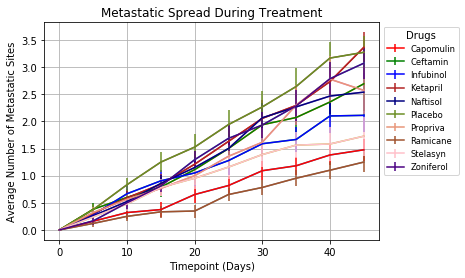

In [30]:
# Generate the Plot (with Error Bars)
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,0])
err1 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,0], yerr=metsit_sem_df.iloc[:,0], color='r')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,1])
err2 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,1], yerr=metsit_sem_df.iloc[:,1], color='g')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,2])
err3 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,2], yerr=metsit_sem_df.iloc[:,2], color='b')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,3])
err4 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,3], yerr=metsit_sem_df.iloc[:,3], color='firebrick')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,4])
err5 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,4], yerr=metsit_sem_df.iloc[:,4], color='navy')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,5])
err6 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,5], yerr=metsit_sem_df.iloc[:,5], color='olivedrab')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,6])
err7 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,6], yerr=metsit_sem_df.iloc[:,6], color='darksalmon')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,7])
err8 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,7], yerr=metsit_sem_df.iloc[:,7], color='sienna')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,8])
err9 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,8], yerr=metsit_sem_df.iloc[:,8], color='pink')
plt.plot(mtv_df_metsit.index, mtv_df_metsit.iloc[:,9])
err10 = plt.errorbar(mtv_df_metsit.index, mtv_df_metsit.iloc[:,9], yerr=metsit_sem_df.iloc[:,9], color='indigo')

# Add grids for easy viewing
plt.grid()

# Add xlabel, title, and ylabel
plt.xlabel('Timepoint (Days)')
plt.ylabel('Average Number of Metastatic Sites')
plt.title('Metastatic Spread During Treatment')

# Add the legend
fontP.set_size('small')
plt.legend([err1, err2, err3, err4, err5, err6, err7, err8, err9, err10],
           mtv_df_tumvol.columns, title='Drugs', prop=fontP, bbox_to_anchor=(1.25, 1))

# Save the Figure
plt.show()
plt.tight_layout()

#### Observations
1. Capomulin and Ramicane are the best two at slowing down metastatic spread
2. Every drug performed better than the placebo at slowing down metastatic spread
3. No drug diminishes or lowers the number of metastatic sites

## Survival Rates

In [69]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse = drugs_df.groupby(["Timepoint","Drug"]).agg({'Mouse ID':'count'})
mouse = mouse.unstack()
# Calculating SEM for mouse 
mouse_sem = mouse.sem()
# Checking the data frame
mouse

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

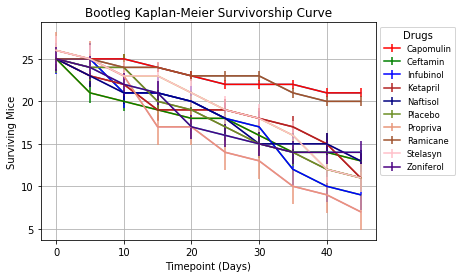

In [104]:
# Generate the Plot (with Error Bars)
plt.plot(mouse.index, mouse.iloc[:,0])
err1 = plt.errorbar(mouse.index, mouse.iloc[:,0], yerr=mouse_sem[0], color='r')
plt.plot(mouse.index, mouse.iloc[:,1])
err2 = plt.errorbar(mouse.index, mouse.iloc[:,1], yerr=mouse_sem[1], color='g')
plt.plot(mouse.index, mouse.iloc[:,2])
err3 = plt.errorbar(mouse.index, mouse.iloc[:,2], yerr=mouse_sem[2], color='b')
plt.plot(mouse.index, mouse.iloc[:,3])
err4 = plt.errorbar(mouse.index, mouse.iloc[:,3], yerr=mouse_sem[3], color='firebrick')
plt.plot(mouse.index, mouse.iloc[:,4])
err5 = plt.errorbar(mouse.index, mouse.iloc[:,4], yerr=mouse_sem[4], color='navy')
plt.plot(mouse.index, mouse.iloc[:,5])
err6 = plt.errorbar(mouse.index, mouse.iloc[:,5], yerr=mouse_sem[5], color='olivedrab')
plt.plot(mouse.index, mouse.iloc[:,6])
err7 = plt.errorbar(mouse.index, mouse.iloc[:,6], yerr=mouse_sem[6], color='darksalmon')
plt.plot(mouse.index, mouse.iloc[:,7])
err8 = plt.errorbar(mouse.index, mouse.iloc[:,7], yerr=mouse_sem[7], color='sienna')
plt.plot(mouse.index, mouse.iloc[:,8])
err9 = plt.errorbar(mouse.index, mouse.iloc[:,8], yerr=mouse_sem[8], color='pink')
plt.plot(mouse.index, mouse.iloc[:,9])
err10 = plt.errorbar(mouse.index, mouse.iloc[:,9], yerr=mouse_sem[9], color='indigo')

# Add grids for easy viewing
plt.grid()

# Add xlabel, title, and ylabel
plt.xlabel('Timepoint (Days)')
plt.ylabel('Surviving Mice')
plt.title('Bootleg Kaplan-Meier Survivorship Curve')

# Add the legend
fontP.set_size('small')
plt.legend([err1, err2, err3, err4, err5, err6, err7, err8, err9, err10],
           mtv_df_tumvol.columns, title='Drugs', prop=fontP, bbox_to_anchor=(1.25, 1))

# Save the Figure
plt.show()
plt.tight_layout()

#### Observations
1. Capomulin and Ramicane have the highest number of surviving subjects
2. Other drugs seem to perform at the same level as the placebo
3. No treatments had zero deaths observed during the treatment period

## Tumor Volume Change Bar Graph

In [119]:
# Calculate the percent changes for each drug
delta = ((mtv_df_tumvol.iloc[9] - mtv_df_tumvol.iloc[0])/mtv_df_tumvol.iloc[0])*100

# Display the data to confirm
delta

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

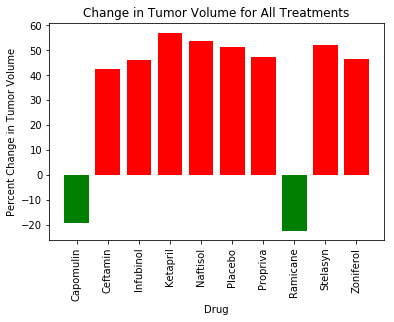

In [127]:
# Make the graph
delta_neg = delta.copy()
delta_pos = delta.copy()
delta_pos[delta_pos < 0] = np.nan
delta_neg[delta_neg > 0] = np.nan
plt.bar(delta.index, delta_pos, color='r')
plt.bar(delta.index, delta_neg, color='g')
plt.xticks(delta.index, rotation="vertical")
plt.xlabel('Drug')
plt.ylabel('Percent Change in Tumor Volume')
plt.title('Change in Tumor Volume for All Treatments')
plt.show()
plt.tight_layout()

#### Observations
1. Capomulin and Ramicane have negative change in tumor volume (x̄ = 19%)
2. Every other drug performed similarly to the placebo